# R, ggplot, dplyr

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

[IPython Notebook](http://ipython.org/notebook.html) wyraste ze środowiska dla Pythona na środowisko do różnych języków (obecnie zmieniający nazwę na [Jupyter](https://jupyter.org/) - gra słów pomiędzy Jowiszem a [Julia](http://julialang.org/), [Python](https://www.python.org/), [R](http://www.r-project.org/)).

Można nawet przetestować online (bez instalacji czegokolwiek): [Try Jupyter!](https://try.jupyter.org/) (Python 3, Julia, R, Haskell, Ruby).

Ogólnie są dwa sposoby używania innych języków w IPython Notebook. Jeden to zaczynanie komórki od `%%nazwa_jezyka` drugi to uruchomienie całego kernela w innym języku (wtedy z Pythonem nie na już styku). Obie metody wymagają instalacji narzędzi... z wyjątkami:

In [1]:
%%javascript
var tekst = "Julia ma pytona, który robi rrr...!";
alert(tekst);

<IPython.core.display.Javascript object>

Dla R pokażemy interakcję przy pomocy `%%R`. Jest to szczególnie przydatne, gdy chcemy tylko część analizy zrobić w R (np. wykresy). Dla porównania, typowym sposobem używania R jest przez [RStudio](http://www.rstudio.com/)

*UWAGA*: O ile instalacja ani Pythona (z Anaconda), ani R nie powinna sprawdzić problemów niezależnie od systemu, to instalacja interakcji między nimi może być cięższa (zwłaszcza pod Windowsem). Warto sięgać rady wujka Google, Stack Exchange itd.

In [2]:
# wymagane zainstalowanie rpy2
%load_ext rpy2.ipython

In [3]:
%%R
# biblioteka do wykresow
library(ggplot2)

In [ ]:
%%R
# jesli jakas biblioteka nie jest zainstalowana, to robimy tak:
install.packages("ggplot2")

In [4]:
%%R
# R domyslnie laduje zbior iryskow
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


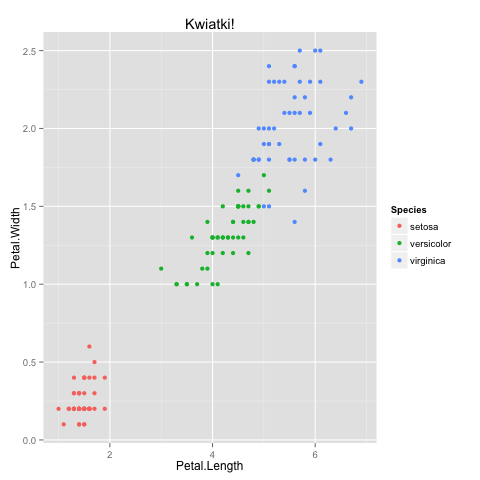

In [5]:
%%R
# typowy wykres wyglada tak; aes definiuje tzw estetyki
# w wykresach dodajemy (doslownie!) kolejne warstwy
ggplot(iris, aes(x=Petal.Length, y=Petal.Width)) +
  geom_point(aes(color=Species)) +
  ggtitle("Kwiatki!")

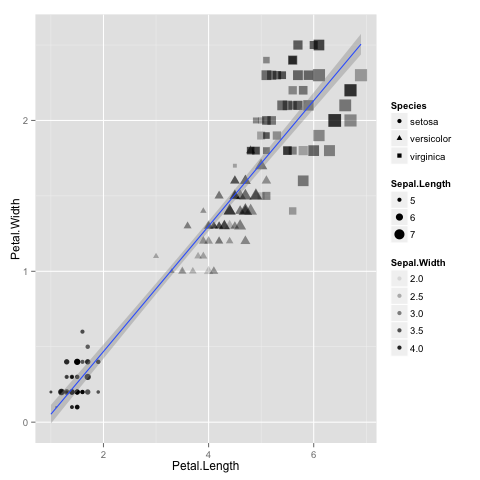

In [6]:
%%R
# mozemy poszalec operujac innymi parametrami
ggplot(iris, aes(x=Petal.Length, y=Petal.Width)) +
  geom_point(aes(size=Sepal.Length, alpha=Sepal.Width, shape=Species)) +
  stat_smooth(method="lm")

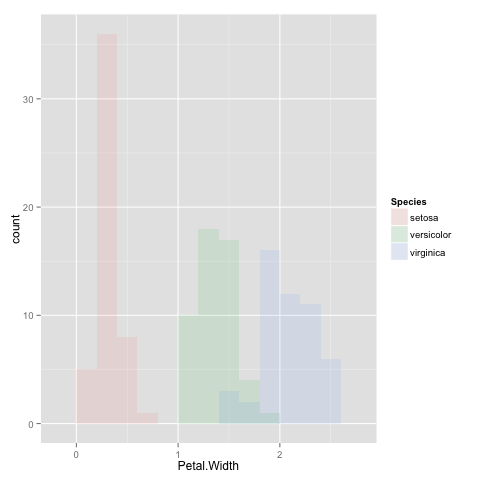

In [9]:
%%R
ggplot(iris, aes(x=Petal.Width)) +
  geom_histogram(binwidth=0.2, aes(fill=Species), alpha=0.1, position="identity")
# BTW: a dlaczego alpha=0.7 NIE jest w aes(...)?

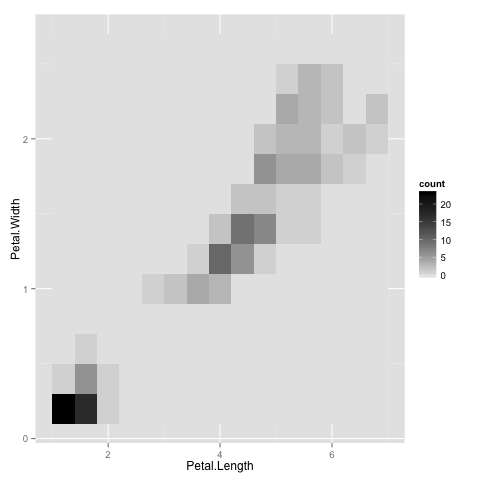

In [8]:
%%R
ggplot(iris, aes(x=Petal.Length, y=Petal.Width)) +
  geom_bin2d(binwidth=c(0.4, 0.2), drop=FALSE) +
  scale_fill_continuous(low="gray90", high="black")

In [10]:
import pandas as pd
df_pyt = pd.read_csv("../dane/smiertelnosc_polska_kobiety.csv")

In [11]:
df_pyt.head()

,Wiek,1950,1960,1970,1980,1990,2000,2010
0,0,0.09911,0.04830,0.02902,0.01783,0.01697,0.00733,0.00452
1,1,0.02258,0.00637,0.00372,0.00275,0.00209,0.00111,0.00079
2,5,0.00667,0.00219,0.00184,0.00158,0.00110,0.00067,0.00050
3,10,0.00491,0.00175,0.00149,0.00115,0.00109,0.00071,0.00058
4,15,0.00878,0.00277,0.00213,0.00181,0.00172,0.00145,0.00104


Przy `%%R` możemy dodawać opcje, takie jak np.

* `-i pandasowy_dataframe_na_wejscu` (zostanie zamieniony z Python/Pandas na R)
* `-o rowy_dataframe_na_wyjsciu` (zostanie zamienony z R na Python/Pandas)
* `-w 600` (szerokość tworzonego wykresu)
* `-h 400` (wysokość tworzonego wykresu)

In [12]:
%%R -i df_pyt -o df_pyt_proc

df_pyt_proc = 100 * df_pyt
head(df_pyt_proc)

  Wiek X1950 X1960 X1970 X1980 X1990 X2000 X2010
0    0 9.911 4.830 2.902 1.783 1.697 0.733 0.452
1  100 2.258 0.637 0.372 0.275 0.209 0.111 0.079
2  500 0.667 0.219 0.184 0.158 0.110 0.067 0.050
3 1000 0.491 0.175 0.149 0.115 0.109 0.071 0.058
4 1500 0.878 0.277 0.213 0.181 0.172 0.145 0.104
5 2000 1.216 0.415 0.288 0.238 0.188 0.152 0.111


In [13]:
df_pyt_proc.head()

,Wiek,X1950,X1960,X1970,X1980,X1990,X2000,X2010
0,0,9.911,4.830,2.902,1.783,1.697,0.733,0.452
1,100,2.258,0.637,0.372,0.275,0.209,0.111,0.079
2,500,0.667,0.219,0.184,0.158,0.110,0.067,0.050
3,1000,0.491,0.175,0.149,0.115,0.109,0.071,0.058
4,1500,0.878,0.277,0.213,0.181,0.172,0.145,0.104


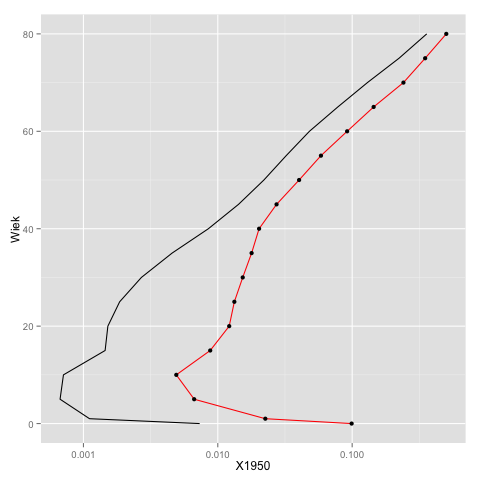

In [15]:
%%R
ggplot(df_pyt, aes(x=Wiek, y=X1950)) +
  geom_line(color="red") +
  geom_point() +
  geom_line(aes(y=X2000)) +
  scale_y_log10() +
  coord_flip()

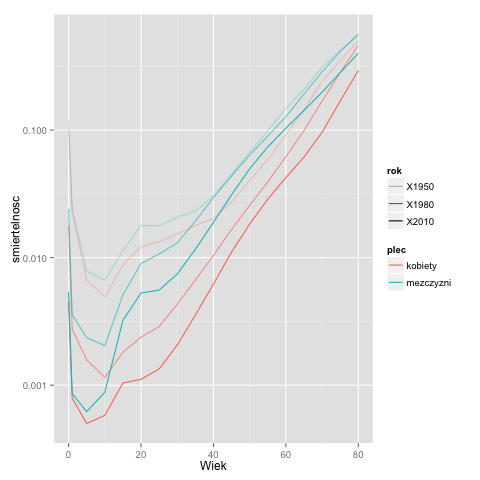

In [17]:
%%R
library(reshape2)
library(dplyr)

kobiety <- read.csv("../dane/smiertelnosc_polska_kobiety.csv")
mezczyzni <- read.csv("../dane/smiertelnosc_polska_mezczyzni.csv")

rozwiniete_k <- melt(kobiety, id.vars=c("Wiek"))
rozwiniete_k$plec <- "kobiety"

rozwiniete_m <- melt(mezczyzni, id.vars=c("Wiek"))
rozwiniete_m$plec <- "mezczyzni"

polaczone <- rbind(rozwiniete_k, rozwiniete_m)
polaczone <- polaczone %>%
  rename(rok=variable, smiertelnosc=value) %>%
  filter(rok %in% c("X1950","X1980","X2010"))

ggplot(polaczone, aes(x=Wiek, y=smiertelnosc)) +
  geom_line(aes(color=plec, alpha=rok, shape=rok)) +
  scale_y_log10() +
  scale_alpha_discrete(range=c(0.3, 1))

Kilka przykładów z analizy matur, by dać *feeling* (z projektu [Analiza Matur - DELab](https://github.com/stared/delab-matury)):

* [roboczy ipynb z wykresami w Pandas i ggplot2](https://github.com/stared/delab-matury/blob/master/eksploracje/laureaci.ipynb)
* [histogramy wyników z matur](https://github.com/stared/delab-matury/tree/master/owoce/histogramy)

In [17]:
from IPython.display import Image
Image(url="https://raw.githubusercontent.com/stared/delab-matury/master/owoce/histogramy/j._polski_podstawowa_2014.png")

W `R` `data.frame` jest wbudowane (zresztą, jest to inspiracja `DataFrame` w `Pandas`). Jednak wiele funkcjonalności do wybierania kolumn, filtrowania wartości oraz transformacji danych jest zawartych w bibiotece [dplyr](http://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html) oraz w [reshape2](http://seananderson.ca/2013/10/19/reshape.html).

O ile składnia samego R jest inna niż Pythona, oraz niektóre funkcję mają różne nazwy i składnię - ogólna filozofia `dplyr` jest podobna do `Pandas` (w razie czego poniżej są "rozmówki").

## Zobacz też

* [Quick Introduction to ggplot2](http://blog.echen.me/2012/01/17/quick-introduction-to-ggplot2/) (nie zakłada znajomości R!)
* [Dokumentacja ggplot2](http://docs.ggplot2.org/current/) 
* [R Markdown](http://rmarkdown.rstudio.com/) - czyli coś podobnego wychodzącego od R (ale też pozwala używać inne języki); interkatywny edytor np. [editR](https://github.com/swarm-lab/editR)
* [Comparing Python pandas and R dplyr](http://nbviewer.ipython.org/gist/TomAugspurger/6e052140eaa5fdb6e8c0) - *"rozmówki"*
* [Data Wranglig cheat sheet - dyplyr and tidyr](http://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf)
* [IPython kernels for other languages](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages)
* Pakiety wzorowane na [ggplot2](http://ggplot2.org/):
    * [ggvis](http://ggvis.rstudio.com/) (też w R, ale pozwalające na interaktywność)
    * [Gadfly](http://gadflyjl.org/) (w Julia)
    * [ggplot Python](http://ggplot.yhathq.com/) (część funkcjonalności ggplot2, w czystym Pythonie)